# Microéconomie 5
## TD4 : Externalités

### Exercice 2 : Implémentation d’un optimum de Pareto en présence d’externalités positives

Les dotations initiales sont $\omega^A = (4, 4)$ et $\omega^B = (6, 6)$. Les agents ont les préférences

\begin{aligned}
    U^A(x^A) &= \ln(x_1^A) + x_2^A \\
    U^B(x^B, x_1^A) &= \ln(x_1^B) + x_2^B + \frac{\ln(x_1^A)}{2}.
\end{aligned}
    
Le code suivant commence par définir ces données du problème.

**Dans le code ci-dessous, vous pouvez modifier librement les dotations $\omega^A$ et $\omega^B$ pour voir comment cela affecte les résultats.**

In [5]:
omegaA <- c(4, 4)                                        # dotation initiale de A
omegaB <- c(6, 6)                                        # dotation initiale de B
omega1 <- omegaA[1] + omegaB[1]                          # dotation totale en bien 1
omega2 <- omegaA[2] + omegaB[2]                          # dotation totale en bien 2
UA <- function(x1, x2) log(x1) + x2                      # fonction d'utilité de A
UB <- function(x1, x2, z1) log(x1) + x2 +log(z1)/2       # fonction d'utilité de B

Ici **$A$ exerce une externalité positive sur $B$** par sa consommation de bien 1 ($U^B$ croît quand $x_1^A$ augmente). Le **bénéfice marginal** en terme de bien 2 est donné par

\begin{equation}
    \frac{ \frac{\partial U^B}{\partial x_1^A} }{ \frac{\partial U^B}{\partial x_2^B} } = \frac{ \frac{1}{2 x_1^A} }{1} = \frac{1}{2 x_1^A}.
\end{equation}

Plus $A$ consomme de bien 1, plus le bénéfice _marginal_ est faible.

Traçons les courbes d'indifférence (A en bleu, B en orange). Notons que **$B$ considère l'externalité comme donnée**.

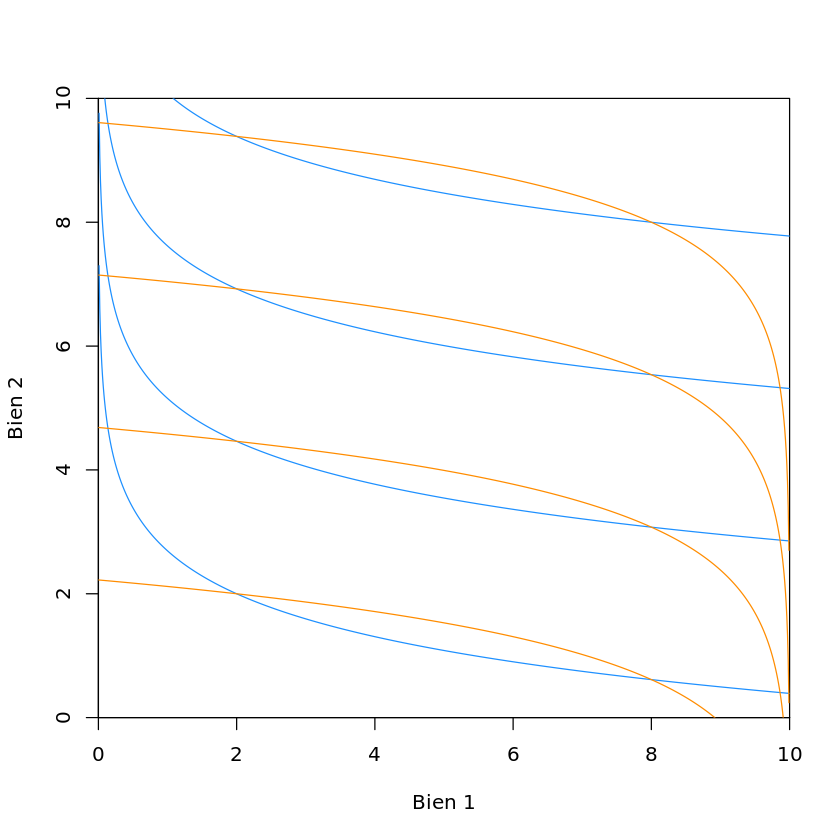

In [6]:
x1 <- seq(0, omega1, length=1000)

indiffA <- function(U) U - log(x1)
indiffB <- function(U) U - log(x1)

niveauxA <- seq(UA(omega1/5, omega2/5), UA(4*omega1/5, 4*omega2/5), len = 4)
niveauxB <- seq(UB(omega1/5, omega2/5, 1), UB(4*omega1/5, 4*omega2/5, 1), len = 4)

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", xlab = "Bien 1", ylab = "Bien 2", xaxs = "i", yaxs = "i")
for (U in niveauxA) lines(x1, indiffA(U), col = "dodgerblue", ylim = c(0, omega2))                # CI de A
for (U in niveauxB) lines(x1, rev(omega2 - indiffB(U)), col = "darkorange", ylim = c(0, omega2))  # CI de B

Cherchons d'abord les **optima de Pareto internes**. Pour cela, on résout par exemple

\begin{equation}
    \max_{x^A, x^B} \; U^A(x^A, x_1^B) \qquad
        \text{s.c.} \; \begin{cases}
        U^B(x^B) \geq \underline U^B \\
        x_1^A + x_1^B \leq \omega_1 \\
        x_2^A + x_2^B \leq \omega_2 \\
        x_i^k > 0 \; (\forall i \in \{1, 2\}, k \in \{A, B\}).
        \end{cases}
\end{equation}

En ignorant _a priori_ les contraintes de positivité des allocations, le lagrangien associé à ce problème s'écrit

\begin{equation}
    \mathcal L (x^A, x^B, \lambda, \mu_1, \mu_2) = \ln(x_1^A) + x_2^A + \lambda \left( \ln(x_1^B) + x_2^B + \frac{\ln(x_1^A)}{2} - \underline U^B \right) + \mu_1 (\omega_1 - x_1^A - x_1^B) + \mu_2 (\omega_2 - x_2^A - x_2^B).
\end{equation}

et les conditions du premier ordre sont

\begin{aligned}
    &\frac{1}{x_1^A} + \lambda \frac{1}{2 x_1^A} - \mu_1 = 0 \\
    &1 - \mu_2 = 0 \\
    &\lambda \frac{1}{x_1^B} - \mu_1 = 0 \\
    &\lambda - \mu_2 = 0 \\
    &U^B(x^B) = \underline U^B \\
    &x_1^A + x_1^B = \omega_1 \\
    &x_2^A + x_2^B = \omega_2.
\end{aligned}

Une combinaison adéquate de ces équations fournit

\begin{equation}
    \underbrace{
        \underbrace{\frac{1}{x_1^A}}_{= \mathsf{TMS}^A}
        + \underbrace{\frac{1}{2 x_1^A}}_{\text{bénéfice marginal}}
    }_\text{valeur sociale du bien 1 consommé par $A$}
    = \frac{\mu_1}{\mu_2}
    = \underbrace{
    \underbrace{\frac{1}{x_1^B}}_{= \mathsf{TMS}^B}
    }_\text{valeur sociale du bien 1 consommé par $B$}.
\end{equation}

À cause de l'externalité, l'égalité des TMS des agents n'est plus vérifiée à l'optimum : ce sont désormais les **valeurs sociales** des consommations (valeur privée, i.e. TMS, plus dommage ou bénéfice marginal) qui sont égales.

On résout cette équation en utilisant $x_1^B = \omega_1 - x_1^A$ et on obtient finalement

\begin{equation}
    \boxed{ x_1^A = \frac{3\omega_1}{5} } \overset{\text{A.N.}}{=} 6
    \quad \text{et} \quad 
    \boxed{ x_1^B = \frac{2\omega_1}{5} } \overset{\text{A.N.}}{=} 4.
\end{equation}

Les allocations optimales sont donc à un niveau fixe d'allocation en bien 1, tandis que les allocations en bien 2 doivent juste vérifier $x_2^A + x_2^B = \omega_2$. Cela correspond à un segment vertical dans la boîte d'Edgeworth.

La **valeur sociale** du bien 1 à l'optimum de Pareto est alors

\begin{equation}
    \mathsf{TMS}^B \left(x_1^B = \frac{2\omega_1}{5} \right) \overset{\text{A.N.}}{=} \frac{1}{4}
\end{equation}

tandis que le bénéfice marginal est 

\begin{equation}
    \frac{1}{2 x_1^A} \overset{\text{A.N.}}{=} \frac{1}{12}.
\end{equation}

Je représente la courbe des optima ci-dessous dans la boîte d'Edgeworth (en violet). Je représente aussi les optima en coin même si nous n'en avons pas discuté ci-dessus (voir TD1 exercice 2).

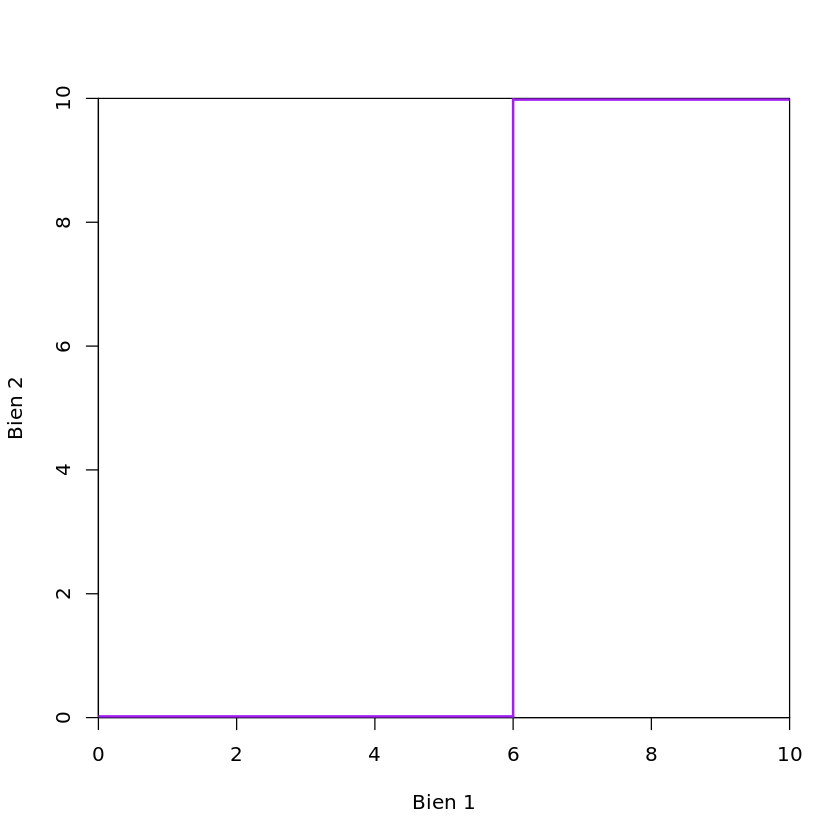

In [7]:
plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
lines(c(3*omega1/5, 3*omega1/5), c(0, omega2), lwd = 2, col = "purple")                 # optima internes
lines(c(0, 3*omega1/5), c(0, 0)+.002*omega2, lwd = 2, col = "purple")                   # optima en coin : xA2 = 0
lines(c(3*omega1/5, omega1), c(omega2, omega2)-.002*omega2, lwd = 2, col = "purple")    # optima en coin : xB2 = 0

Les demandes brutes de $A$ et $B$ sont (voir TD2 exercice 2)

\begin{equation}
    \boxed{ x_1^A(p) = \frac{p_2}{p_1} }
    \quad \text{ et } \quad
    \boxed{ x_2^A(p) = \frac{p_1}{p_2} \omega_1^A + \omega_2^A - 1 }
\end{equation}

et

\begin{equation}
    \boxed{ x_1^B(p) = \frac{p_2}{p_1} }
    \quad \text{ et } \quad
    \boxed{ x_2^B(p) = \frac{p_1}{p_2} \omega_1^B + \omega_2^B - 1 }.
\end{equation}

(Formules valables pour les $\omega^A$ et $\omega^B$ qui donnent des demandes en bien 2 positives ; sinon nous avons des solution en coin, non traitées ici.)

On veut maintenant implémenter l'optimum $X = (6, 5 ; 4, 5)$. _On normalise désormais le prix du numéraire à $p_2 = 1$._

Pour implémenter cet optimum $X$, les prix doivent être personalisés selon 

\begin{equation}
    p_1^A = \mathsf{TMS}^A (x_1^A = 6) \overset{\text{A.N.}}{=} \frac{1}{6}
    \quad \text{ et } \quad
    p_1^B = \mathsf{TMS}^B (x_1^B = 4) \overset{\text{A.N.}}{=} \frac{1}{4}.
\end{equation}

L'agent $A$ exerce une externalité positive et doit donc payer un prix inférieur afin de l'encourager à consommer davantage de bien 1. La subvention optimale $s^A$ est donnée par
\begin{equation}
    s^A = p_1^B - p_1^A \overset{\text{A.N.}}{=} \frac{1}{12}.
\end{equation}

Représentons les droites de budget d'équilibre associées à ces prix dans la boîte d'Edgeworth ($A$ en bleu, $B$ en orange).

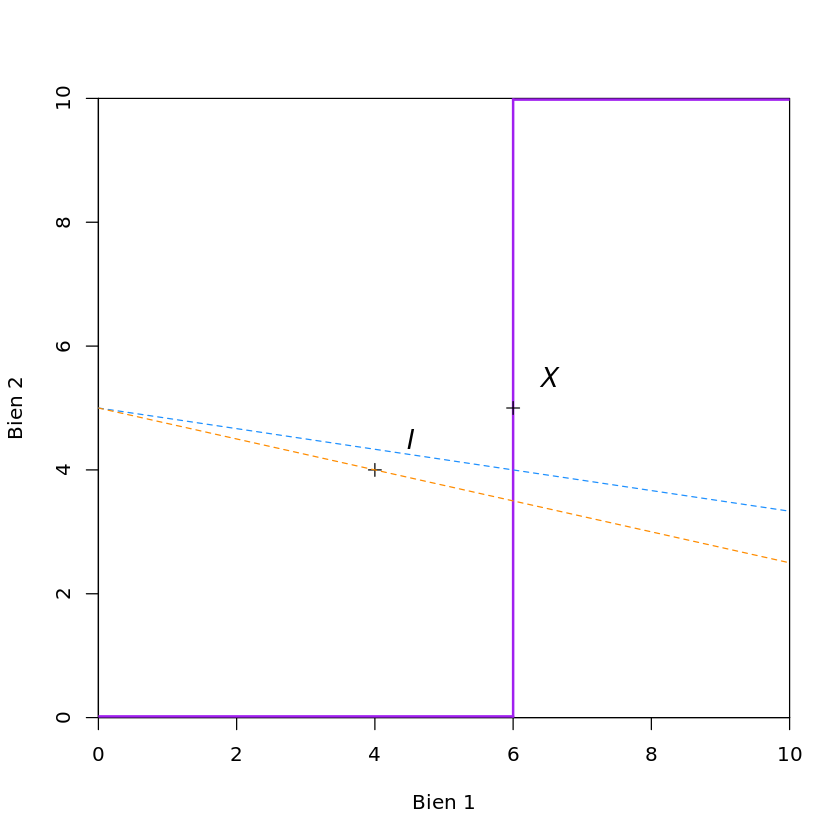

In [8]:
I <- omegaA
X <- c(6, 5)


# Allocation optimale en bien 1 et prix d'équilibre

x1A <- 3*omega1/5
x1B <- omega1 - x1A
p1A <- 1/x1A
sA <- 1/(2*x1A)
p1B <- 1/x1B


# Boîte d'Edgeworth, allocation initiale I, courbe des optima

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                               # allocation initiale I
    text(I[1]+.05*omega1, I[2]+.05*omega2, labels = "I", cex = 1.3, font = 3)
lines(c(3*omega1/5, 3*omega1/5), c(0, omega2), lwd = 2, col = "purple")                   # optima internes
lines(c(0, 3*omega1/5), c(0, 0)+.002*omega2, lwd = 2, col = "purple")                     # optima en coin : xA2 = 0
lines(c(3*omega1/5, omega1), c(omega2, omega2)-.002*omega2, lwd = 2, col = "purple")      # optima en coin : xB2 = 0


# Droites de budget d'équilibre et allocation visée

lines(x1, p1B*omegaA[1] + omegaA[2] - p1A*x1, lty = 2, col = "dodgerblue")                # budget d'équilibre de A
lines(x1, omega2 - omegaB[2] - p1B*(omegaB[1] - omega1 + x1), lty = 2, col = "darkorange")# budget d'équilibre de B
points(X[1], X[2], pch = 3)                                                               # allocation initiale I
    text(X[1]+.05*omega1, X[2]+.05*omega2, labels = "X", cex = 1.3, font = 3)

En subventionnant ainsi $A$, le régulateur doit dépenser $s^A$ pour chaque unité de bien 1 consommée par $A$. La dépense fiscale est donc

\begin{equation}
    s^A x_1^A \overset{\text{A.N.}}{=} \frac{1}{2}.
\end{equation}

On voit sur le graphe ci-dessus que les prix personalisés ne sont pas suffisants pour implémenter l'allocation $X$ : après échange, $B$ a trop de numéraire (bien 2), et $A$ pas assez. Précisément, ils ont respectivement

\begin{equation}
    x_2^A = p_1^B \omega_1^A + \omega_2^A - p_1^A x_1^A \overset{\text{A.N.}}{=} 4
\end{equation}
et
\begin{equation}
    x_2^B = p_1^B \omega_1^B + \omega_2^B - p_1^B x_1^B \overset{\text{A.N.}}{=} 6 + \frac{1}{2}.
\end{equation}

On reconnaît un excès de $\frac{1}{2}$ unités de numéraire par rapport aux allocations initiales, qui correspond évidemment à la dépense fiscale $s^A x_1^A$ calculée ci-dessus (ce sont les ressources qui ont été injectées dans l'économie).

Afin d'atteindre l'allocation optimale $X = (6, 5 ; 4, 5)$ visée, on peut réaliser des transferts forfaitaires $T^A$ et $T^B$ qui doivent être tels que

\begin{equation}
    \underbrace{p_1^B \omega_1^A + \omega_2^A - p_1^A x_1^A}_\text{richesse de $A$ post-échange} + T^A = 5
    \iff T^A \overset{\text{A.N.}}{=} 1
\end{equation}
et
\begin{equation}
    \underbrace{p_1^B \omega_1^B + \omega_2^B - p_1^B x_1^B}_\text{richesse de $B$ post-échange} + T^B = 5
    \iff T^B \overset{\text{A.N.}}{=} -\frac{3}{2}
\end{equation}

c'est-à-dire qu'il faut donner une unité de numéraire à $A$ et en prendre $\frac{3}{2}$ à $B$. Comme le régulateur était débiteur de $\frac{1}{2}$ unités après la subvention, ces transferts rééquilibrent donc ses comptes ($s^A x_1^A + T^A + T^B = 0$).